In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv('boston.csv')

D:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I152071100,2611,Other,ABDUCTION - INTICING,D4,151,NaN,2015-08-25 14:00:00,2015,8,Tuesday,14,Part Two,BERKELEY ST,42.346465,-71.070704,"(42.34646505, -71.07070436)"
1,I152054466,2611,Other,ABDUCTION - INTICING,B2,319,NaN,2015-07-01 20:30:00,2015,7,Wednesday,20,Part Two,NAZING ST,42.306641,-71.085850,"(42.30664081, -71.08584976)"
2,I162018570,2611,Other,ABDUCTION - INTICING,D4,,NaN,2016-03-09 17:28:00,2016,3,Wednesday,17,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192018747,2611,Other,ABDUCTION - INTICING,B2,179,NaN,2019-03-13 19:34:00,2019,3,Wednesday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
4,I162001276,2611,Other,ABDUCTION - INTICING,B3,428,NaN,2016-01-05 16:12:00,2016,1,Tuesday,16,Part Two,NORFOLK ST,42.280566,-71.088017,"(42.28056608, -71.08801662)"


In [5]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,525575.000000,525575.000000,525575.000000,525575.000000,495821.000000,495821.000000
mean,2332.260663,2017.591973,6.694575,13.073356,42.240681,-70.952056
std,1182.734163,1.566007,3.313055,6.350834,1.872682,3.029333
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.203312
25%,1102.000000,2016.000000,4.000000,9.000000,42.296852,-71.097466
50%,3005.000000,2018.000000,7.000000,14.000000,42.325024,-71.077734
75%,3201.000000,2019.000000,9.000000,18.000000,42.348288,-71.062535
max,3831.000000,2020.000000,12.000000,23.000000,42.395042,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525575 entries, 0 to 525574
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      525575 non-null  object 
 1   OFFENSE_CODE         525575 non-null  int64  
 2   OFFENSE_CODE_GROUP   426839 non-null  object 
 3   OFFENSE_DESCRIPTION  525575 non-null  object 
 4   DISTRICT             523113 non-null  object 
 5   REPORTING_AREA       525575 non-null  object 
 6   SHOOTING             100482 non-null  object 
 7   OCCURRED_ON_DATE     525575 non-null  object 
 8   YEAR                 525575 non-null  int64  
 9   MONTH                525575 non-null  int64  
 10  DAY_OF_WEEK          525575 non-null  object 
 11  HOUR                 525575 non-null  int64  
 12  UCR_PART             426729 non-null  object 
 13  STREET               504386 non-null  object 
 14  Lat                  495821 non-null  float64
 15  Long             

In [7]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP      98736
OFFENSE_DESCRIPTION         0
DISTRICT                 2462
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                98846
STREET                  21189
Lat                     29754
Long                    29754
Location                    0
dtype: int64

In [8]:
from matplotlib import pyplot as plt

grouped_df = df.groupby(['YEAR','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
grouped_df.head()



,YEAR,OFFENSE_CODE_GROUP,OFFENSE_CODE
0,2015,Aggravated Assault,1415
1,2015,Aircraft,4
2,2015,Arson,11
3,2015,Assembly or Gathering Violations,240
4,2015,Auto Theft,988


Text(0.5, 1.0, 'Top 10 offense groups')

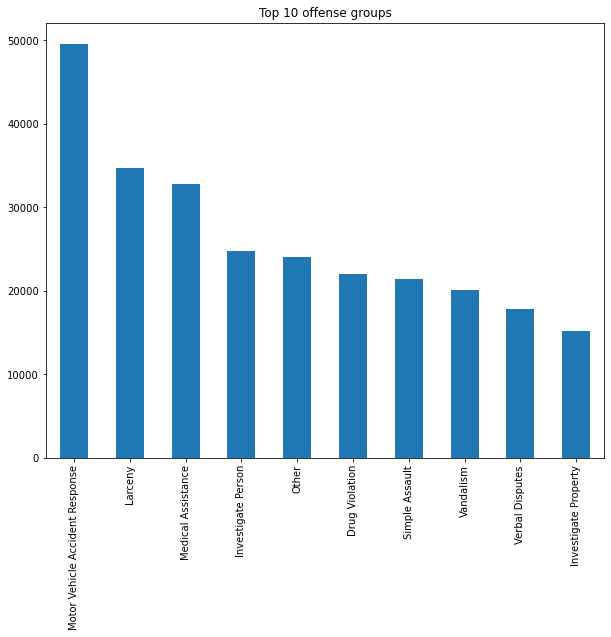

In [9]:
top_10 = df['OFFENSE_CODE_GROUP'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 offense groups')